In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Выбираем распределение $\href{https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE}{Парето}$. В качестве параметров распределения задаем $x_m=3.0$ и $k=4.0$. 

In [40]:
x0 = 3
k = 4
pareto = sts.pareto(k, loc=0, scale=x0)


Математическое ожидание для распределения Парето:  $\dfrac{k\cdot x_m}{k-1} = \dfrac{4 \cdot 3}{4-1}=4$

Дисперсия: $(\dfrac{x_m}{k-1})^2 \cdot \dfrac{k}{k-2} = (\dfrac{3}{4-1})^2 \cdot \dfrac{4}{4-2} = 2$

Среднеквадратическое отклонение: $\sigma=\sqrt{2} = 1.41$

Проверим корректность рассчитанных значений:

In [41]:
pareto_mean = pareto.mean()
pareto_std = pareto.std()
print 'Theoretical mean: %.2f'%pareto_mean
print 'Theoretical standard dev: %.2f'%pareto_std

Theoretical mean: 4.00
Theoretical standard dev: 1.41


Сгенерируем выборку объема 1000 для данного распределения:

In [42]:
r = pareto.rvs(size=1000)

Построим гистаграмму распределения и графики теоретических функции распределения (cdf) и  плотности вероятности (pdf)

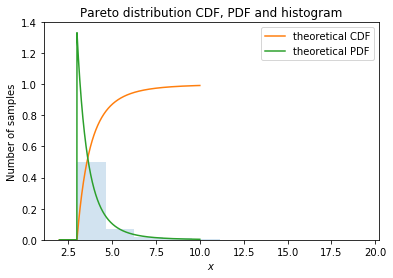

In [43]:
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(2.0,10.0,1000)
cdf = pareto.cdf(x)
plt.plot(x, cdf, label = 'theoretical CDF')
pdf = pareto.pdf(x)
plt.plot(x, pdf, label = 'theoretical PDF')
plt.ylabel('Number of samples')
plt.xlabel('$x$')
plt.legend()
plt.title("Pareto distribution CDF, PDF and histogram")

Для оценки распределения выборочного среднего случайной величины, заданной распределением Парето, сгенерируем 1000 выборок объёма n при n, принимающем значения  10, 50 и 150. Для n = 10 получаем распределение выборочных средних (mean_array):

In [44]:
n = 10
x = np.arange(1, 1000, 1)
mean_array = []
for i in x:
    mean_array.append(pareto.rvs(size=n).mean())

Согласно центральной предельной теореме распределение выборочных средних должно задаваться нормальным распределением. Зададим параметры нормально распределения случайной величины $\mu$ и $\sigma$. Для получения значений этих параметров используем  теоретические среднее и дисперсию случайной величины, заданной распределением Парето:

In [45]:
mu = pareto_mean
sigma = pareto_std/n**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)

Построим график функции плотности вероятности и гисторгамму распределения выборочных средних:

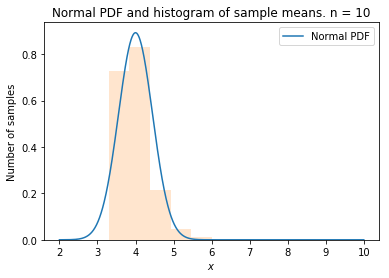

In [46]:
x = np.linspace(2.0,10.0,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'Normal PDF')
plt.hist(mean_array, normed=True, histtype='stepfilled', alpha=0.2)
plt.ylabel('Number of samples')
plt.xlabel('$x$')
plt.legend()
plt.title("Normal PDF and histogram of sample means. n = %s"%n)

Повторим эксперимент для других значений n. Для n = 50

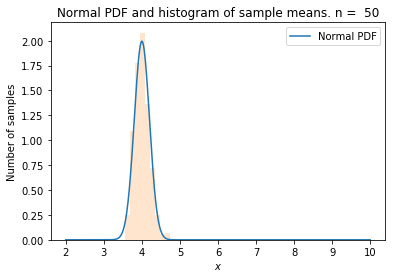

In [47]:
n = 50
x = np.arange(1, 1000, 1)
mean_array = []
for i in x:
    mean_array.append(pareto.rvs(size=n).mean())
mu = pareto_mean
sigma = pareto_std/n**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)
x = np.linspace(2.0,10.0,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'Normal PDF')
plt.hist(mean_array, normed=True, histtype='stepfilled', alpha=0.2)
plt.ylabel('Number of samples')
plt.xlabel('$x$')
plt.legend()
plt.title("Normal PDF and histogram of sample means. n =  %s"%n)

Для n = 150:

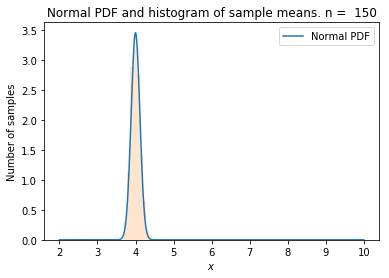

In [48]:
n = 150
x = np.arange(1, 1000, 1)
mean_array = []
for i in x:
    mean_array.append(pareto.rvs(size=n).mean())
mu = pareto_mean
sigma = pareto_std/n**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)
x = np.linspace(2.0,10.0,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'Normal PDF')
plt.hist(mean_array, normed=True, histtype='stepfilled', alpha=0.2)
plt.ylabel('Number of samples')
plt.xlabel('$x$')
plt.legend()
plt.title("Normal PDF and histogram of sample means. n =  %s"%n)

Можно сделать вывод, что  с ростом объема выборки n точность апроксимации распределения выборочных средних нормальным распределением увеличивается.